# Homework_2022_03_07

<font color=ff0000> 截止日期 3.31（周四） 23:59</font>

### Exercise 1 Pandas基础练习(4')

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data = {
    'age': [24, 53, 23, 24, 33, 42, 57, 57, 36, 29, 53, 39],
    'gender': ['M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F'],
    'occupation': ['technician', 'other', 'writer', 'technician', 'technician', 'executive', 'administrator', 'administrator', 'administrator', 'student', 'lawyer', 'other'],
    'zip_code': ['85711', '94043', '32067', '43537', '15213', '98101', '91344', '91344', '05201', '01002', '90703', '30329']
}

1.1 创建一组从1开始递增的id，作为行索引，由data生成一个DataFrame(1')：

In [60]:
# TODO
index = [x for x in range(1, 1+len(data['age']))]
df = pd.DataFrame(data=data, index=index)
df

,age,gender,occupation,zip_code
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002


1.2 删除DataFrame中重复的行（保留一行），再删除所有occupation为"other"的行(0.5'):

In [61]:
# TODO
df = df[df['occupation'] != 'other']
df = df.drop_duplicates(keep='first')
df

,age,gender,occupation,zip_code
1,24,M,technician,85711
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002
11,53,M,lawyer,90703


1.3 以两种方式访问DataFrame的第一行(0.5')：

In [62]:
# TODO
print(df.loc[1,:])
print(df.iloc[0,:])

age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 1, dtype: object
age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 1, dtype: object


1.4 以两种方式访问DataFrame的"occupation"列(0.5')：

In [63]:
# TODO
print(df['occupation'])
print(df.loc[:,'occupation'])

1        technician
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
Name: occupation, dtype: object
1        technician
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
Name: occupation, dtype: object


1.5 打印出DataFrame中出现次数最多的职业名称(0.5')：

In [64]:
# TODO
print(df.loc[:,'occupation'].value_counts(sort=True).index[0])

technician


1.6 将data_2转换成DataFrame，与上一个DataFrame按照"zip_code"这一列合并，按两种合并方式：

1.合并后结果保留两个DataFrame的并集(0.5')；
2.合并后只保留data_2的所有数据(0.5')。

In [65]:
data_2 = {
    'zip_code': ['85711', '94043', '15213', '98101', '30329'],
    'name': ['Alan', 'Alice', 'Abigail', 'Bob', 'Dave']
}
df2 = pd.DataFrame(data_2)

# TODO
# 方式一
pd.merge(df, df2, on='zip_code', how='outer')

,age,gender,occupation,zip_code,name
0,24.0,M,technician,85711,Alan
1,23.0,M,writer,32067,NaN
2,24.0,M,technician,43537,NaN
3,33.0,F,technician,15213,Abigail
4,42.0,M,executive,98101,Bob
5,57.0,M,administrator,91344,NaN
6,36.0,M,administrator,05201,NaN
7,29.0,M,student,01002,NaN
8,53.0,M,lawyer,90703,NaN
9,NaN,NaN,NaN,94043,Alice


In [66]:
# 方式二
pd.merge(df, df2, left_on='zip_code', right_on='zip_code')[df2.columns]

,zip_code,name
0,85711,Alan
1,15213,Abigail
2,98101,Bob


### Exercise 2 Pandas数据分析(6')

本部分数据基于2022年3月的COVID-19疫情数据进行数据分析。

在此致谢数据来源：https://github.com/BlankerL/DXY-COVID-19-Data ，并祝愿疫情的影响早日结束。

2.1 读取COVID-19_March.csv，通过shape和info()查看数据基本信息(0.5')。

In [67]:
import pandas as pd
#TODO
df = pd.read_csv('COVID19_March.csv')
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34021 entries, 0 to 34020
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continentName            34021 non-null  object 
 1   continentEnglishName     34021 non-null  object 
 2   countryName              34021 non-null  object 
 3   countryEnglishName       31953 non-null  object 
 4   provinceName             34021 non-null  object 
 5   provinceEnglishName      31953 non-null  object 
 6   province_zipCode         34021 non-null  int64  
 7   province_confirmedCount  34021 non-null  int64  
 8   province_suspectedCount  34021 non-null  int64  
 9   province_curedCount      34021 non-null  int64  
 10  province_deadCount       34021 non-null  int64  
 11  cityName                 16252 non-null  object 
 12  cityEnglishName          15017 non-null  object 
 13  city_zipCode             16252 non-null  float64
 14  city_confirmedCount   

2.2 从原表格的updateTime中提取最后更新时间，去除具体时间得到日期，并在原DataFrame中增加一列"Date"保存日期(0.5')。

In [68]:
#TODO
df['Date'] = pd.to_datetime(df['updateTime']).dt.date
df

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,Date
0,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,深圳,Shenzhen,440300.0,2434.0,3.0,1753.0,3.0,2022/3/27 17:18,2022-03-27
1,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,东莞,Dongguan,441900.0,488.0,1.0,340.0,1.0,2022/3/27 17:18,2022-03-27
2,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,广州,Guangzhou,440100.0,2315.0,3.0,2281.0,1.0,2022/3/27 17:18,2022-03-27
3,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,佛山,Foshan,440600.0,353.0,1.0,339.0,0.0,2022/3/27 17:18,2022-03-27
4,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,珠海,Zhuhai,440400.0,330.0,2.0,315.0,1.0,2022/3/27 17:18,2022-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34016,亚洲,Asia,塔吉克斯坦,Tajikstan,塔吉克斯坦,Tajikstan,954003,17786,0,17263,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/3/1 8:50,2022-03-01
34017,南美洲,South America,荷兰加勒比地区,NaN,荷兰加勒比地区,NaN,0,177,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/3/1 8:50,2022-03-01
34018,其他,Others,钻石公主号邮轮,Diamond Princess Cruise Ship,钻石公主号邮轮,Diamond Princess Cruise Ship,0,741,0,574,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/3/1 8:50,2022-03-01
34019,北美洲,North America,蒙特塞拉特,NaN,蒙特塞拉特,NaN,0,163,0,19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/3/1 8:50,2022-03-01


2.3 这里给出的数据由每天循环爬取得到，因此同一地区同一日的数据可能会有多项纪录，但我们只需保存每一天同一个地区（精确到城市）最后一条记录。请对数据进行筛选，按provinceName, cityName, Date三列为标准去重，并将DataFrame按时间从早到晚的顺序排序(1')。

In [69]:
#TODO
df['exacttime'] = pd.to_datetime(df['updateTime'])
df_sort = df.sort_values('exacttime')
df_sort = df_sort.drop_duplicates(subset=['provinceName', 'cityName', 'Date'], keep='last')
df_sort

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,...,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,Date,exacttime
33786,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,...,泸州,Luzhou,510500.0,25.0,0.0,25.0,0.0,2022/3/1 8:56,2022-03-01,2022-03-01 08:56:00
33785,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,...,广安,Guang'an,511600.0,30.0,0.0,30.0,0.0,2022/3/1 8:56,2022-03-01,2022-03-01 08:56:00
33784,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,...,南充,Nanchong,511300.0,40.0,0.0,40.0,0.0,2022/3/1 8:56,2022-03-01,2022-03-01 08:56:00
33783,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,...,达州,Dazhou,511700.0,42.0,0.0,42.0,0.0,2022/3/1 8:56,2022-03-01,2022-03-01 08:56:00
33787,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,...,巴中,Bazhong,511900.0,24.0,0.0,24.0,0.0,2022/3/1 8:56,2022-03-01,2022-03-01 08:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,...,潮州,Chaozhou,445100.0,7.0,0.0,7.0,0.0,2022/3/27 17:18,2022-03-27,2022-03-27 17:18:00
19,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,...,河源,Heyuan,441600.0,7.0,0.0,7.0,0.0,2022/3/27 17:18,2022-03-27,2022-03-27 17:18:00
20,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,...,云浮,Yunfu,445300.0,7.0,0.0,7.0,0.0,2022/3/27 17:18,2022-03-27,2022-03-27 17:18:00
11,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,...,韶关,Shaoguan,440200.0,11.0,0.0,9.0,1.0,2022/3/27 17:18,2022-03-27,2022-03-27 17:18:00


2.4 新建两个DataFrame，分别包含筛选后国内的数据和国外的数据，便于后面分别统计(0.5')。

In [70]:
#TODO
df_domestic = df_sort[df_sort['countryName']=='中国']
df_foreign = df_sort[df_sort['countryName']!='中国']

2.5 对于境外的每一个国家，请用记录中最后一天的病例数(province_confirmed)减去第一天的病例数，再除以之间间隔的天数，以此统计日平均新增情况，并打印全球平均日新增的前十名(1')。

提示：可以使用groupby&apply等方法；请注意，记录的第一天与最后一天未必是3.1和3.27。
参考阅读：https://zhuanlan.zhihu.com/p/101284491

In [71]:
#TODO
def fun(x):
    df_sick = x.sort_values('Date')
    confirm_total = df_sick['province_confirmedCount'].iloc[-1]
    if len(df_sick['province_confirmedCount']) != 1:
        confirm_total -= df_sick['province_confirmedCount'].iloc[0]
    date_total = df_sick['Date'].iloc[-1] - df_sick['Date'].iloc[0]
    confirm_avg = confirm_total/(date_total.days)
    return pd.Series([confirm_avg])

df_foreign2 = df_foreign.groupby('provinceName').apply(fun)
df_foreign2.columns=['avg']
df_foreign2.sort_values('avg', ascending=False)[:10]

,avg
provinceName,
韩国,321663.653846
越南,209240.269231
德国,181072.500000
法国,80409.961538
英国,73145.961538
意大利,56343.730769
荷兰,56220.961538
日本,51193.423077
俄罗斯,50667.461538


2.6 利用pandas的cut功能对境外的日平均新增情况进行分组，打印每个数量级区间内的国家数(0.5')。

In [72]:
#TODO
group = pd.cut(x=df_foreign2['avg'], bins=[0, 10, 100, 1000, 10000, 100000, 1000000])
group.value_counts()

(100, 1000]          49
(10, 100]            48
(0, 10]              44
(1000, 10000]        39
(10000, 100000]      24
(100000, 1000000]     3
Name: avg, dtype: int64

2.7 绘制3月以来吉林省每日新增的疫情曲线，以后一日减去前一日的确诊病例之差作为新增标准(提示，差分操作在pandas中也有对应的方法)(1')。

Text(0.5, 1.0, 'COVID-19 confirmed cases in Jilin Daily Increase')

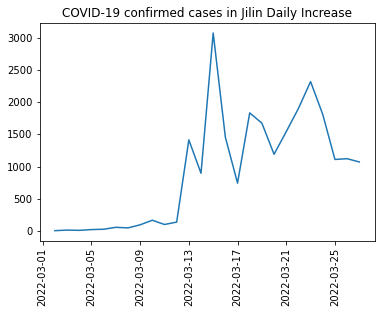

In [73]:
#TODO
import matplotlib.pyplot as plt

def fun2(x):
    return x.iloc[0,7]

df_jilin = df_domestic[df_domestic['provinceName']=='吉林省']
df_jilin = df_jilin.groupby('Date').apply(fun2)
series_jilin = df_jilin.diff(1)

fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(series_jilin[:])
ax.set_title("COVID-19 confirmed cases in Jilin Daily Increase")

2.8 请绘制3月以来上海市每日新增的疫情曲线，在一张图上同时画出总新增与本土新增（cityName中有境外输入条目，可以作为区分）(1')。

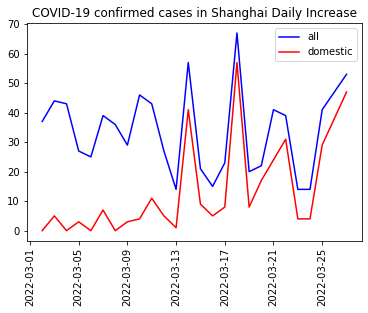

In [74]:
#TODO
import matplotlib.pyplot as plt

def fun3(x):
    return x.iloc[0,7]

def fun4(x):
    tmp = x[x['cityName']=='境外输入'].loc[:,['province_confirmedCount','city_confirmedCount']]
    tmp['domestic'] = tmp['province_confirmedCount']-tmp['city_confirmedCount']
    return tmp['domestic']

df_shanghai = df_domestic[df_domestic['provinceName']=='上海市']
df_shanghai1 = df_shanghai.groupby('Date').apply(fun3)
df_shanghai2 = df_shanghai.groupby(['Date','cityName']).apply(fun4)
series_shanghai1 = df_shanghai1.diff(1)
series_shanghai2 = df_shanghai2.diff(1)
series_shanghai3 = pd.Series(data=series_shanghai2.values, index=series_shanghai1.index)

fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(series_shanghai1[:], color='b', label='all')
ax.plot(series_shanghai3[:], color='r', label='domestic')
ax.set_title("COVID-19 confirmed cases in Shanghai Daily Increase")
ax.legend(loc = 'upper right', frameon=True, fontsize=10)

### 附加题 聚类方法比较及评价 (+2')
本题我们利用Minst数据集进行KMeans聚类方法的测试，并对聚类的效果进行评估。

In [1]:
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X = pd.read_csv('./train_X.csv') # 为了方便起见，这里只采用前6000个MNIST数据
y = pd.read_csv('./train_y.csv')
X, y = np.array(X), np.array(y)
print(X.shape)
print(y.shape)

(6000, 784)
(6000, 1)


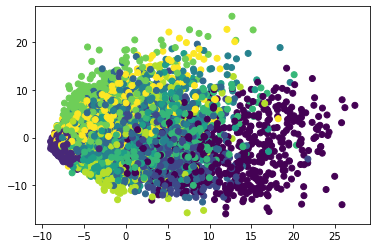

In [2]:
pca2d = PCA(n_components=2)
X_std = preprocessing.scale(X) # 数据标准化
X_2d = pca2d.fit_transform(X_std)# 数据降维至两维便于可视化
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)

3.1 请在原始的标准化数据X_std和降至二维的数据X_2d上分别进行KMeans聚类，并对两种聚类结果进行可视化（以标签作为颜色，均只在二维可视化即可）和纯度计算（参考PPT第四页的公式）。+1'

In [3]:
#TODO
kmeans_for_std = KMeans(n_clusters=10)
kmeans_for_2d = KMeans(n_clusters=10)

In [4]:
kmeans_std = kmeans_for_std.fit_transform(X=X_std)
kmeans_std_pca2 = pca2d.fit_transform(kmeans_for_std.cluster_centers_)

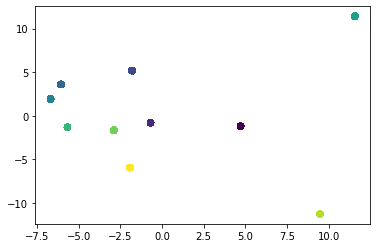

In [5]:
#以下是聚类点可视化
plt.scatter(kmeans_std_pca2[kmeans_for_std.labels_[:],0],
    kmeans_std_pca2[kmeans_for_std.labels_[:],1], c=kmeans_for_std.labels_)

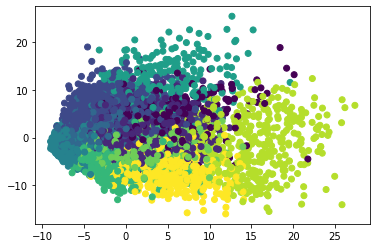

In [6]:
#以下是聚类可视化
plt.scatter(X_2d[:,0], X_2d[:,1], c=kmeans_for_std.labels_)

In [7]:
#计算nir
n_mat = np.zeros((10, 10))
for x in range(6000):
    i = y[x][0]
    r = kmeans_for_std.labels_[x]
    n_mat[i][r] += 1
print(n_mat)
#计算纯度
P = [max(g)/sum(g) for g in n_mat.T]
Purity_std = sum([max(g)/6000 for g in n_mat.T])
print(Purity_std)

[[  4.  97.   3.   0.   3.   0.  11.  24. 348. 102.]
 [  2.   1.   2.   1. 659.   0.   4.   0.   0.   2.]
 [194.  47.  15.   1.  79.   8.   7.  36.   1. 193.]
 [ 28. 314.  21.   8.  59.   9.   3.   4.   0. 162.]
 [  4.   3. 314.  41.  52.  66. 131.   5.   4.   3.]
 [  6. 174.  25.   3.  17.   9. 239.   9.   6.  26.]
 [ 52.   9.   4.   0.  52.   1.   4. 465.  18.   3.]
 [  2.   0. 228. 320.  43.  54.   3.   0.   0.   1.]
 [  6. 188.  28.   5. 114.  16. 161.   1.   4.  28.]
 [  2.  12. 283. 213.  25.  54.   6.   0.   3.   3.]]
0.5186666666666667


In [8]:
kmeans_2d = kmeans_for_2d.fit_transform(X=X_2d)

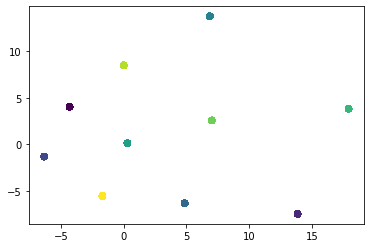

In [9]:
#以下是聚类点可视化
plt.scatter(kmeans_for_2d.cluster_centers_[kmeans_for_2d.labels_[:],0],
    kmeans_for_2d.cluster_centers_[kmeans_for_2d.labels_[:],1], c=kmeans_for_2d.labels_)

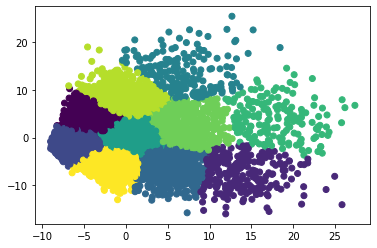

In [10]:
#以下是聚类可视化
plt.scatter(X_2d[:,0], X_2d[:,1], c=kmeans_for_2d.labels_)

In [11]:
#计算nir
n_mat2 = np.zeros((10, 10))
for x in range(6000):
    i = y[x][0]
    r = kmeans_for_2d.labels_[x]
    n_mat2[i][r] += 1
print(n_mat2)
#计算纯度
P = [max(g)/sum(g) for g in n_mat2.T]
Purity_2d = sum([max(g)/6000 for g in n_mat2.T])
print(Purity_2d)

[[  0. 187.   2. 115.   3.  30. 144.  93.   1.  17.]
 [  7.   0. 642.   0.   0.   6.   0.   0.   3.  13.]
 [ 36.  33.  25. 153.   3. 172.   1.  72.  42.  44.]
 [ 60.   6.  56. 106.  12. 129.   2.  42.  59. 136.]
 [131.   1. 121.   4.  49. 132.   3.  44. 100.  38.]
 [ 21.   3.  70.  48.  13.  88.   4.  49.  19. 199.]
 [  4.  10.  95.  76.  13. 137.  13.  94.   6. 160.]
 [245.   0. 154.   1.  34.  40.   0.   7. 162.   8.]
 [ 58.   2.  76.  40.  15.  96.   2.  28.  30. 204.]
 [184.   0. 190.   1.  39.  52.   1.  23.  95.  16.]]
0.34199999999999997


3.2 请用KM算法等方式实现聚类结果和原标签的最优匹配，并在此基础上计算两种结果的F值。+1'

参考阅读：

1. 匈牙利算法Wiki https://zh.wikipedia.org/wiki/%E5%8C%88%E7%89%99%E5%88%A9%E7%AE%97%E6%B3%95 
2. KM算法讲解 https://blog.csdn.net/sixdaycoder/article/details/47720471
3. KM算法python实现https://blog.csdn.net/weixin_39504758/article/details/120183504


In [12]:
#以下是标准化数据
#计算precision,recall和F
precision1 = np.array([n_mat[i][r]/sum(n_mat[:,r]) for i in range(10) for r in range(10)]).reshape((10, 10))
recall1 = np.array([n_mat[i][r]/sum(n_mat[i,:]) for i in range(10) for r in range(10)]).reshape((10, 10))
F1 = 2*precision1*recall1/(precision1+recall1)
F1 = np.nan_to_num(F1)

<ipython-input-12-a9821adb22e2>:5: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2*precision1*recall1/(precision1+recall1)


In [19]:
label_left, label_right = [max(g) for g in n_mat], [0 for _ in n_mat]
S, T = {}, {}

visited_left = [False for _ in n_mat]
visited_right = [False for _ in n_mat]
slack_right = [float('inf') for _ in n_mat]


def find_path(i, visited_left, visited_right, slack_right):
    visited_left[i] = True
    for j, match_weight in enumerate(n_mat[i]):
        if visited_right[j]:
            continue
        gap = label_left[i] + label_right[j] - match_weight
        if gap == 0:
            visited_right[j] = True
            if j not in T or find_path(T[j], visited_left, visited_right, slack_right):
                T[j] = i
                S[i] = j
                return True

        else:
            slack_right[j] = min(slack_right[j], gap)
    return False

def KM():
    m = len(n_mat)
    for i in range(m):
        # 重置辅助变量
        slack_right = [float('inf') for _ in range(m)]
        while True:
            visited_left = [False for _ in n_mat]
            visited_right = [False for _ in n_mat]
            if find_path(i,visited_left,visited_right, slack_right):
                break
            d = float('inf')
            for j, slack in enumerate(slack_right):
                if not visited_right[j] and slack < d:
                    d = slack
            for k in range(m):
                if visited_left[k]:
                    label_left[k] -= d
                if visited_right[k]:
                    label_right[k] += d
    return S, T

KM()

({0: 8, 1: 4, 2: 0, 3: 9, 4: 2, 5: 6, 6: 7, 7: 3, 8: 1, 9: 5},
 {8: 0, 4: 1, 0: 2, 1: 8, 2: 4, 6: 5, 7: 6, 3: 7, 9: 3, 5: 9})

In [20]:
#计算F值
F = sum([F1[i,r]*sum(n_mat[i,:])/6000 for i,r in S.items()])
F

0.4807413803890802

In [21]:
#以下是二维数据
#计算precision,recall和F
precision2 = np.array([n_mat2[i][r]/sum(n_mat2[:,r]) for i in range(10) for r in range(10)]).reshape((10, 10))
recall2 = np.array([n_mat2[i][r]/sum(n_mat2[i,:]) for i in range(10) for r in range(10)]).reshape((10, 10))
F2 = 2*precision2*recall2/(precision2+recall2)
F2 = np.nan_to_num(F2)

<ipython-input-21-7174279e65ad>:5: RuntimeWarning: invalid value encountered in true_divide
  F2 = 2*precision2*recall2/(precision2+recall2)


In [22]:
label_left, label_right = [max(g) for g in n_mat2], [0 for _ in n_mat2]
S, T = {}, {}

visited_left = [False for _ in n_mat2]
visited_right = [False for _ in n_mat2]
slack_right = [float('inf') for _ in n_mat2]


def find_path(i, visited_left, visited_right, slack_right):
    visited_left[i] = True
    for j, match_weight in enumerate(n_mat2[i]):
        if visited_right[j]:
            continue
        gap = label_left[i] + label_right[j] - match_weight
        if gap == 0:
            visited_right[j] = True
            if j not in T or find_path(T[j], visited_left, visited_right, slack_right):
                T[j] = i
                S[i] = j
                return True

        else:
            slack_right[j] = min(slack_right[j], gap)
    return False

def KM():
    m = len(n_mat2)
    for i in range(m):
        # 重置辅助变量
        slack_right = [float('inf') for _ in range(m)]
        while True:
            visited_left = [False for _ in n_mat2]
            visited_right = [False for _ in n_mat2]
            if find_path(i,visited_left,visited_right, slack_right):
                break
            d = float('inf')
            for j, slack in enumerate(slack_right):
                if not visited_right[j] and slack < d:
                    d = slack
            for k in range(m):
                if visited_left[k]:
                    label_left[k] -= d
                if visited_right[k]:
                    label_right[k] += d
    return S, T

KM()

({0: 1, 1: 2, 2: 3, 3: 5, 4: 4, 5: 6, 6: 7, 7: 8, 8: 9, 9: 0},
 {1: 0, 2: 1, 5: 3, 9: 8, 0: 9, 3: 2, 7: 6, 8: 7, 4: 4, 6: 5})

In [23]:
#计算F值
F = sum([F2[i,r]*sum(n_mat[i,:])/6000 for i,r in S.items()])
F

0.27257108718074796